In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['creditcard.csv']


In [2]:
#!git clone https://github.com/eBay/RANSynCoders.git

In [3]:
train = pd.read_csv("../input/creditcard.csv")
x_test = train.drop(columns=['Class'])
# Separate features (testX) and target variable (testY)
testX = train.drop("Class", axis=1)  # Features are all columns except "Class"
testY = train["Class"]               # Target variable is "Class"

# If you want to verify the shapes of testX and testY
print("testX shape:", testX.shape)
print("testY shape:", testY.shape)

testX shape: (284807, 30)
testY shape: (284807,)


In [4]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
df = pd.read_csv('../input/creditcard.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df = df.drop('Time',axis=1)

In [10]:
X = df.drop('Class',axis=1).values 
y = df['Class'].values

In [11]:
X.shape

(284807, 29)

In [12]:
X -= X.min(axis=0)
X /= X.max(axis=0)

In [13]:
X.mean()

0.5213456986251124

In [14]:
X.shape

(284807, 29)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.1)

In [16]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from keras.layers import Input, Embedding, multiply, BatchNormalization
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K
from keras import initializers
from keras.utils import to_categorical

K.set_image_dim_ordering('th')

# Deterministic output.
# Tired of seeing the same results every time? Remove the line below.
np.random.seed(1000)

# The results are a little better when the dimensionality of the random vector is only 10.
# The dimensionality has been left at 100 for consistency with other GAN implementations.
randomDim = 10

Using TensorFlow backend.


In [17]:
from keras.layers import Input, Dense, LeakyReLU, BatchNormalization, Reshape, Flatten
from keras.models import Model
from keras.models import Sequential

def build_generator(latent_dim, data_dim):
    # Encoder
    input_data = Input(shape=(data_dim,))
    encoded = Dense(32)(input_data)
    encoded = LeakyReLU(alpha=0.2)(encoded)
    encoded = BatchNormalization(momentum=0.8)(encoded)

    # Latent space
    latent_representation = Dense(latent_dim)(encoded)

    # Decoder
    decoded = Dense(32)(latent_representation)
    decoded = LeakyReLU(alpha=0.2)(decoded)
    decoded = BatchNormalization(momentum=0.8)(decoded)
    decoded = Dense(data_dim, activation='tanh')(decoded)

    # Model
    autoencoder = Model(input_data, decoded)

    # Encoder model
    encoder = Model(input_data, latent_representation)

    # Decoder model
    decoder_input = Input(shape=(latent_dim,))
    decoder_output = autoencoder.layers[-3](decoder_input)
    decoder_output = autoencoder.layers[-2](decoder_output)
    decoder_output = autoencoder.layers[-1](decoder_output)
    decoder = Model(decoder_input, decoder_output)

    return autoencoder

In [18]:
def build_generator(latent_dim,data_dim):

        model = Sequential()

        model.add(Dense(16, input_dim=latent_dim))
    
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(32, input_dim=latent_dim))
    
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(data_dim,activation='tanh'))

        model.summary()

        noise = Input(shape=(latent_dim,))
        img = model(noise)

        return Model(noise, img)

In [19]:
generator = build_generator(latent_dim=10,data_dim=29)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                176       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 29)                957       
Total para

In [20]:
def build_discriminator(data_dim,num_classes):
    model = Sequential()
    model.add(Dense(31,input_dim=data_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dropout(0.25))
    model.add(Dense(16,input_dim=data_dim))
    model.add(LeakyReLU(alpha=0.2))
    
    model.summary()
    img = Input(shape=(data_dim,))
    features = model(img)
    valid = Dense(1, activation="sigmoid")(features)
    label = Dense(num_classes+1, activation="softmax")(features)
    return Model(img, [valid, label])

In [21]:
discriminator = build_discriminator(data_dim=29,num_classes=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 31)                930       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 31)                0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 31)                124       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                512       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 16)                0         
Total params: 1,566
Trainable params: 1,504
Non-trainable params: 62
_________________________________________________________________


In [22]:
optimizer = Adam(0.0002, 0.5)
discriminator.compile(loss=['binary_crossentropy', 'categorical_crossentropy'],
    loss_weights=[0.5, 0.5],
    optimizer=optimizer,
    metrics=['accuracy'])

In [23]:
noise = Input(shape=(10,))
img = generator(noise)
discriminator.trainable = False
valid,_ = discriminator(img)
combined = Model(noise , valid)
combined.compile(loss=['binary_crossentropy'],
    optimizer=optimizer)

In [24]:
X_train.shape

(256326, 29)

In [25]:
from imblearn.under_sampling import RandomUnderSampler

In [26]:
rus = RandomUnderSampler(random_state=42)

In [27]:
X_res, y_res = rus.fit_sample(X, y)

In [28]:
X_res.shape

(984, 29)

In [29]:
X_res -= X_res.min()
X_res /= X_res.max()

In [30]:
X_test -= X_test.min()
X_test /= X_test.max()

In [31]:
X_test_res, y_test_res = rus.fit_sample(X_test,y_test)

In [32]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [33]:
y_res.shape

(984,)

In [34]:
def train(X_train,y_train,
          X_test,y_test,
          generator,discriminator,
          combined,
          num_classes,
          epochs, 
          batch_size=128):
    
    f1_progress = []
    d_loss_progress = []
    half_batch = int(batch_size / 2)

    noise_until = epochs

    # Class weights:
    # To balance the difference in occurences of digit class labels.
    # 50% of labels that the discriminator trains on are 'fake'.
    # Weight = 1 / frequency
    cw1 = {0: 1, 1: 1}
    cw2 = {i: num_classes / half_batch for i in range(num_classes)}
    cw2[num_classes] = 1 / half_batch 
    d_loss_sum = 0

    for epoch in range(epochs):

        # ---------------------
        #  Train Discriminator
        # ---------------------

        # Select a random half batch of images
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        imgs = X_train[idx]

        # Sample noise and generate a half batch of new images
        noise = np.random.normal(0, 1, (half_batch, 10))
        gen_imgs = generator.predict(noise)

        valid = np.ones((half_batch, 1))
        fake = np.zeros((half_batch, 1))

        labels = to_categorical(y_train[idx], num_classes=num_classes+1)
        fake_labels = to_categorical(np.full((half_batch, 1), num_classes), num_classes=num_classes+1)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(imgs, [valid, labels], class_weight=[cw1, cw2])
        d_loss_fake = discriminator.train_on_batch(gen_imgs, [fake, fake_labels], class_weight=[cw1, cw2])
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train Generator
        # ---------------------

        noise = np.random.normal(0, 1, (batch_size, 10))
        validity = np.ones((batch_size, 1))

        # Train the generator
        g_loss = combined.train_on_batch(noise, validity, class_weight=[cw1, cw2])

        # Plot the progress
        print ("%d [D loss: %f, acc: %.2f%%, op_acc: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[3], 100*d_loss[4], g_loss))
        d_loss_sum += 100*d_loss[3]
        
        if epoch % 10 == 0:
            _,y_pred = discriminator.predict(X_test,batch_size=batch_size)
            #print(y_pred.shape)
            y_pred = np.argmax(y_pred[:,:-1],axis=1)
            
            f1 = f1_score(y_test,y_pred)
            print('Epoch: {}, F1: {:.5f}, F1P: {}'.format(epoch,f1,len(f1_progress)))
            cm = confusion_matrix(y_test, y_pred)

            print(cm)
            print(d_loss_sum/10)
            d_loss_progress.append(d_loss_sum/10)
            f1_progress.append(f1)
            d_loss_sum = 0
    
    return f1_progress, d_loss_progress

In [35]:
f1_p, d_l_p = train(X_res,y_res,
             X_test,y_test,
             generator,discriminator,
             combined,
             num_classes=2,
             epochs=2000, 
             batch_size=128)

/opt/conda/lib/python3.6/site-packages/Keras-2.1.5-py3.6.egg/keras/engine/training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


0 [D loss: 0.439273, acc: 46.09%, op_acc: 25.78%] [G loss: 1.320194]


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch: 0, F1: 0.00000, F1P: 0
[[28432     0]
 [   49     0]]
4.609375
1 [D loss: 0.458723, acc: 42.97%, op_acc: 32.81%] [G loss: 1.346049]
2 [D loss: 0.432519, acc: 45.31%, op_acc: 32.03%] [G loss: 1.374251]
3 [D loss: 0.414698, acc: 51.56%, op_acc: 27.34%] [G loss: 1.258615]
4 [D loss: 0.414752, acc: 49.22%, op_acc: 24.22%] [G loss: 1.314001]
5 [D loss: 0.432760, acc: 45.31%, op_acc: 35.16%] [G loss: 1.283183]
6 [D loss: 0.419295, acc: 52.34%, op_acc: 27.34%] [G loss: 1.280744]
7 [D loss: 0.410583, acc: 50.00%, op_acc: 35.16%] [G loss: 1.297837]
8 [D loss: 0.428326, acc: 44.53%, op_acc: 28.12%] [G loss: 1.289198]
9 [D loss: 0.425712, acc: 40.62%, op_acc: 35.16%] [G loss: 1.253735]
10 [D loss: 0.411651, acc: 46.88%, op_acc: 28.91%] [G loss: 1.252662]
Epoch: 10, F1: 0.00000, F1P: 1
[[28432     0]
 [   49     0]]
46.875
11 [D loss: 0.389955, acc: 52.34%, op_acc: 26.56%] [G loss: 1.353056]
12 [D loss: 0.428261, acc: 46.88%, op_acc: 29.69%] [G loss: 1.221978]
13 [D loss: 0.424172, acc: 50.

Text(0,0.5,'F1 Score Validation')

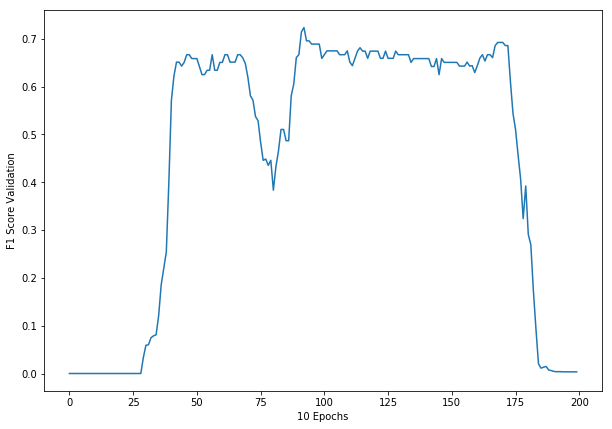

In [36]:
fig = plt.figure(figsize=(10,7))
plt.plot(f1_p)
plt.xlabel('10 Epochs')
plt.ylabel('F1 Score Validation')

Text(0,0.5,'Accuracy')

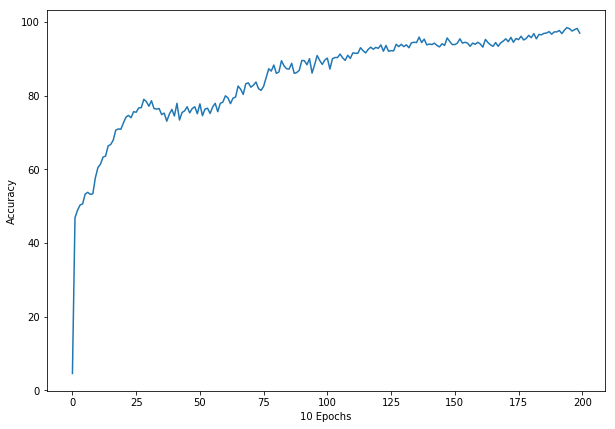

In [37]:
fig = plt.figure(figsize=(10,7))
plt.plot(d_l_p)
plt.xlabel('10 Epochs')
plt.ylabel('Accuracy')